In [1]:
import numpy as np  
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec

# Set font to prevent boxes appearing in the plot
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Define the system of differential equations (EGT model)
def EGT(Fx, t, R1, R2, F1, F2, S1, S2, V1, V2, K, m, n, delta,
        I1, P, Chigh, Clow, D, I2, lambda_val, DeltaU, H, C, N):
    x, y, z = Fx.tolist()  # Unpack state variables
    # Define the differential equations for x, y, z
    dxdt = x * (1 - x) * (R1 - R2 + (S2 - S1 + F2 - F1) * y + n * (P - I1) * z - delta * n * (P - I1) * y * z)
    dydt = y * (1 - y) * (S2 + m * n * (Clow - Chigh) + F2 + x * (S1 - S2 + delta * m * n * (K - Chigh - D) + (F1 - F2)) 
                          + x * z * ((1 + delta) * m * n * (K - D) + m * n * ((1 + 2 * delta) * Chigh + delta * Clow) 
                                     + delta * n * P - C))
    dzdt = z * (1 - z) * (V2 + DeltaU + x * (V1 - V2 + delta * m * n / N * H) 
                          + y * (lambda_val - 1) * DeltaU 
                          + x * y * (delta * n * I2 + delta ** 2 * m * n / N * H))
    return [dxdt, dydt, dzdt]


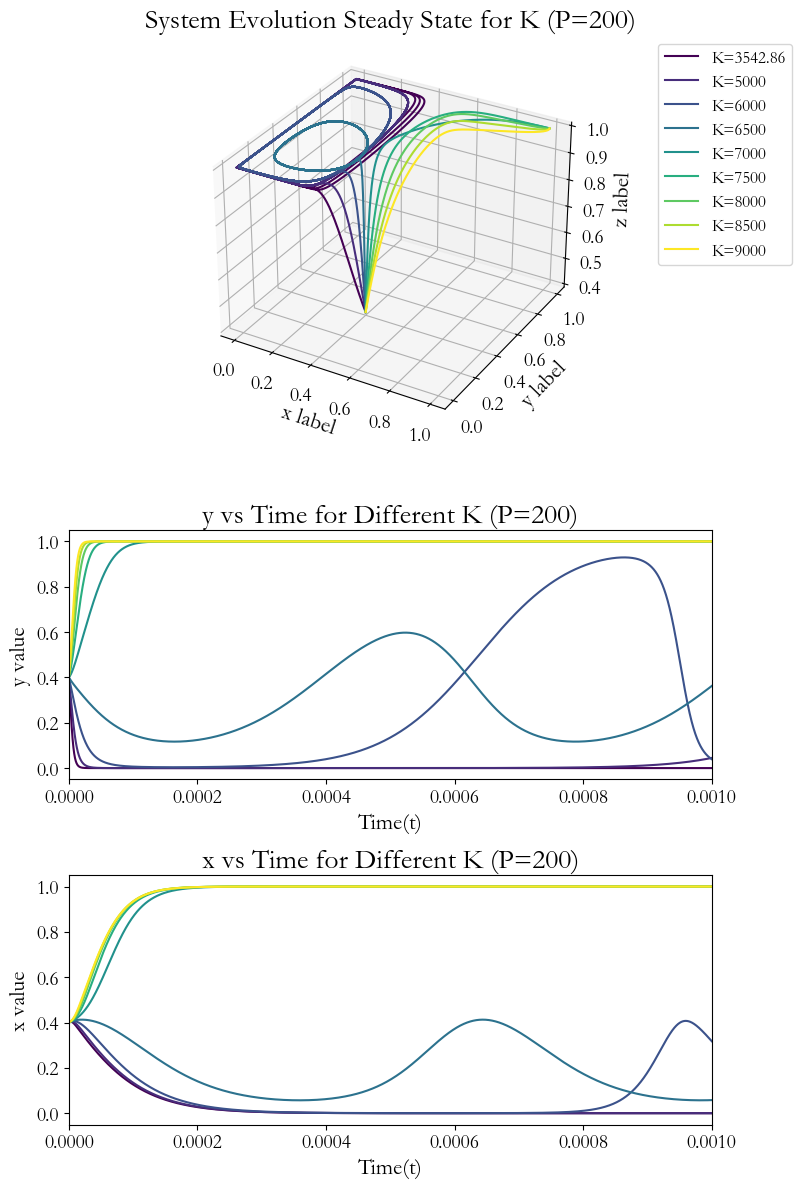

In [4]:
# Initialize the plot
plt.close("all")
fig = plt.figure(figsize=(8, 12))  

# Create a grid layout with 3 subplots: 3D plot, 2D plot for y, and 2D plot for x
gs = gridspec.GridSpec(3, 1, height_ratios=[0.8, 0.5, 0.5])  

# Create subplots
ax1 = fig.add_subplot(gs[0], projection='3d')  # 3D plot
ax2 = fig.add_subplot(gs[1])  # 2D plot for y
ax3 = fig.add_subplot(gs[2])  # 2D plot for x

# Define time range
t = np.arange(0, 0.01, 0.0000001)  

# Define a list of K values for the simulation
K_values = [3542.86, 5000, 6000, 6500, 7000, 7500, 8000, 8500, 9000]

# Set up color map for line colors
colors = cm.viridis(np.linspace(0, 1, len(K_values)))

# Define line styles and widths for the plots
linewidths = [1.5] * len(K_values)  
labels = [f'K={K}' for K in K_values]

# Define base parameters for the simulation
base_args = (13975.2, 4658.4, 1418.74, 709.37, 100, 10, 0.01, 0, 3542.86, 4, 13, 2,
            2189.49, 200, 246.375, 492.75, 7130.73, 0.09, 0.029, 526000, 255.19, 1798.19, 26)

# Store x and y data for each K value
x_data = {}
y_data = {}

# Solve the system for each K value and plot the results
for i, K in enumerate(K_values):
    args = base_args[:8] + (K,) + base_args[9:]  # Update the K parameter
    track1 = odeint(EGT, (0.4, 0.4, 0.4), t, args)  # Solve the system of equations
    
    # Plot the 3D trajectory for each K value
    ax1.plot3D(track1[:, 0], track1[:, 1], track1[:, 2], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])
    
    # Store x and y data for later plotting
    x_data[K] = track1[:, 0]  
    y_data[K] = track1[:, 1]  

# Plot 2D graph of y vs time, restricted to the time range [0, 0.002]
for i, K in enumerate(K_values):
    ax2.plot(t, y_data[K], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])

# Set x-axis limits for y plot
ax2.set_xlim([0, 0.001])

# Plot 2D graph of x vs time, restricted to the time range [0, 0.006]
for i, K in enumerate(K_values):
    ax3.plot(t, x_data[K], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])

# Set x-axis limits for x plot
ax3.set_xlim([0, 0.001])

# Customize labels and titles for the 3D plot
ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=12)
ax1.set_xlabel('x label', fontsize=16)
ax1.set_ylabel('y label', fontsize=16)
ax1.set_zlabel('z label', fontsize=16)
ax1.set_title('System Evolution Steady State for K (P=200)', fontsize=20)

# Customize labels and titles for the 2D y plot
ax2.set_xlabel('Time(t)', fontsize=16)
ax2.set_ylabel('y value', fontsize=16)
ax2.set_title('y vs Time for Different K (P=200)', fontsize=20)

# Customize labels and titles for the 2D x plot
ax3.set_xlabel('Time(t)', fontsize=16)
ax3.set_ylabel('x value', fontsize=16)
ax3.set_title('x vs Time for Different K (P=200)', fontsize=20)

# Adjust font size for axis labels and ticks
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax1.zaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

for tick in ax3.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax3.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

# Save the plot as a PDF file
plt.tight_layout()
plt.savefig('Figure7(a).pdf', format='pdf')

# Display the plot
plt.show()
